### Importing the Data

In [131]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [132]:
#Importing the csv file of original data
raw_data = pd.read_csv('data/default-of-credit-card-clients.csv', header=1, index_col=0)

#checking the record counts
print(raw_data.shape)

#checking basic statistics of the data
raw_data.describe()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [133]:
raw_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [134]:
raw_data.sample(10).transpose()
print(raw_data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [135]:
#extracting the target variable
target = raw_data["default payment next month"]

## Data Exploration

In this section, I will analyze the data so that I can determine any data cleaning or preprocessing that may be needed. This will also help develop my understanding of the data for feature engineering. 

First, I'll check the data for any missing values:

In [136]:
print(raw_data.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


Some variables are categorical with values defined in the dataset documentation. For inteperability of the data it's important to check the categorical variables for undefined values:

In [137]:
print('Values for Sex:', raw_data.SEX.unique())
print('Values for Education:', raw_data.EDUCATION.unique())
print('Values for Marriage:', raw_data.MARRIAGE.unique())
print('Values for Pay_#:', raw_data.PAY_0.unique())

Values for Sex: [2 1]
Values for Education: [2 1 3 5 4 6 0]
Values for Marriage: [1 2 3 0]
Values for Pay_#: [ 2 -1  0 -2  1  3  4  8  7  5  6]


This reveals several undefined values:
* **Education** has several undefined values; only 1-4 were defined. 
* **Marriage** does not have 0 defined
* **Pay#** does not have -2 or 0 defined

### Outlier Analysis

Based on the above observation that there are more category types than were defined, the following plots look at the how often they are found in the data. I broke down the categories by sex for further insight into the data.

Note: Need to add title to plots and label categories in more meaningful way.

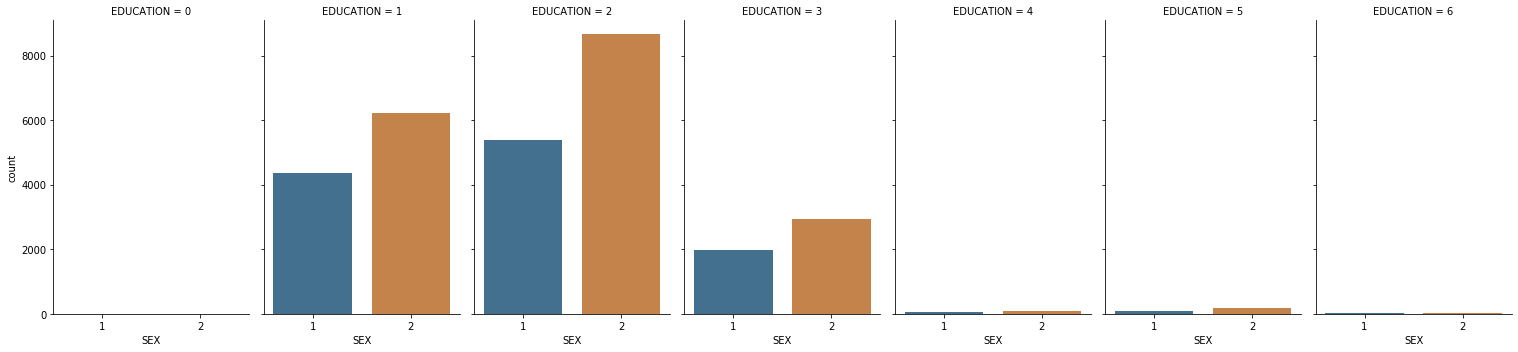

In [138]:
#Facet plot of the Education categories each broken down by Sex 
g = sns.catplot(x="SEX", col="EDUCATION",
                 data=raw_data, saturation=.5,
                 kind="count", ci=None, aspect=.6)

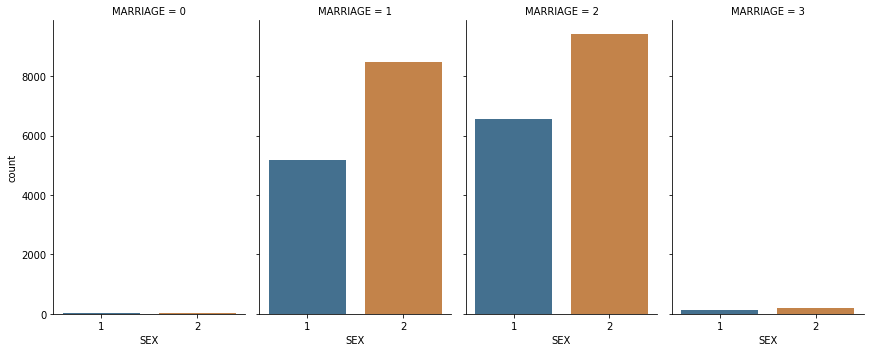

In [139]:
#Facet plot of the Marriage categories each broken down by Sex  
g = sns.catplot(x="SEX", col="MARRIAGE",
                 data=raw_data, saturation=.5,
                 kind="count", ci=None, aspect=.6)

This shows that the undefined and "other" categories are used infrequently in the data. 

There are also numerical variables to be analyzed for outliers.

The Credit Limit variable `CREDIT_BAL` is plotted below to test my hypothesis that credit grows with age.

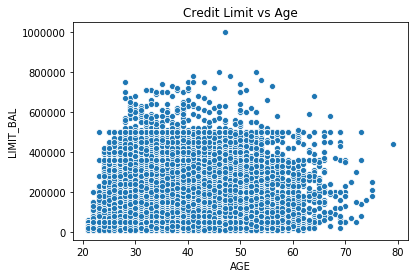

In [140]:
#Does the credit limit increase with age?
ax = sns.scatterplot(x="AGE", y="LIMIT_BAL",
                     data=raw_data).set_title("Credit Limit vs Age")

This plot shows that the credit limit given to a cardholder is not a function of age. Rather it seems uniformly distributed across ages. This plot also shows there there is one very large credit limit (near 1MM), but I do not beleive this point should be removed as an outlier.

### Feature distribution

Text(0.5, 1.0, 'Age Distribution')

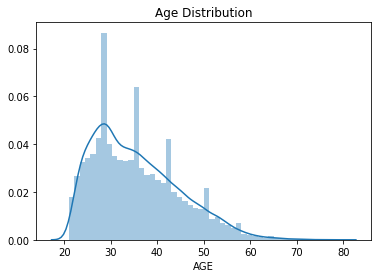

In [141]:
sns.distplot(raw_data.AGE).set_title("Age Distribution")

Text(0.5, 1.0, 'Credit Limit Distribution')

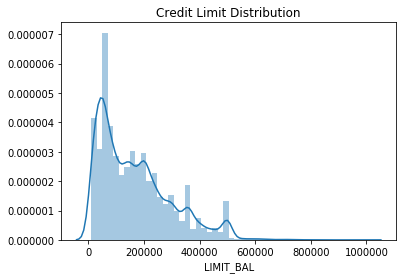

In [142]:
sns.distplot(raw_data.LIMIT_BAL).set_title("Credit Limit Distribution")

Text(0.5, 1.0, 'Bill Amount Distribution')

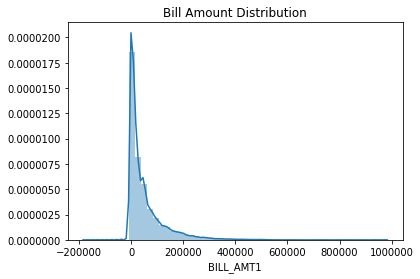

In [143]:
sns.distplot(raw_data.BILL_AMT1).set_title("Bill Amount Distribution")

Text(0.5, 1.0, 'Pay Amount Distribution')

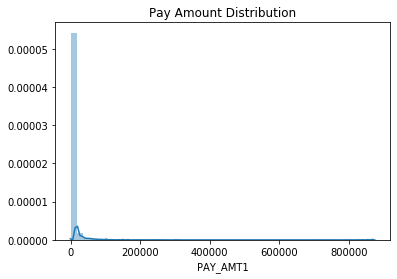

In [144]:
sns.distplot(raw_data.PAY_AMT1).set_title("Pay Amount Distribution")

I'm leaving off plots of every bill period under the assumption that the distributions are similar.

### Exploratory Visualization

The dataset includes time based information that was collected over a 5 month period. Additionally there is an inherent temporal relationship between the variables. Credit card statements calculate the balance due as follows: 

$$ Bill \_ Amount = Previous \_ Balance - Payment + Purchases + Fees + Interest$$

The following plot explores the relationship between the `BILL_AMT` and `PAY_AMT` variables. 

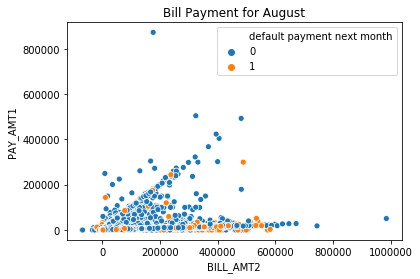

In [145]:
ax = sns.scatterplot(x="BILL_AMT2", y="PAY_AMT1", hue="default payment next month",
                     data=raw_data).set_title("Bill Payment for August")

The data which is on the diagonal line $ y = x$ represents cardholders that pay their total balance before the next bill statement. The data below the line shows when the cardholder pays less than the previous balance and thus begins paying interest. There is also the presence of payments above the bill amount and in such a case the cardholder would be given credit the next month. This may be the cardholder paying the posted amount for purchases which have not yet appeared on a bill. Suprisingly some of these cardholders go into default after having a negative bill. 

Another interesting observation that this plot shows is that many cardholders that will default are already not paying the bill in September.

There are a few data points where either the Bill amount is very large or the pay amount is much larger than the bill amount. These are potential outliers.

The following plot explores if the bill amount may correlate with default.

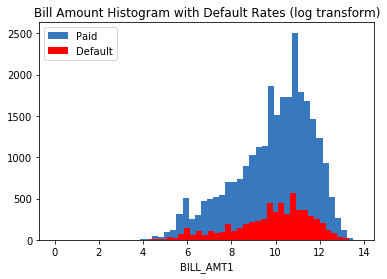

In [146]:
#plot of proportion of default by bill amount using a log scale (negatives are filtered out in order to use log)
sns.distplot(np.log(raw_data[raw_data["BILL_AMT1"]>0].BILL_AMT1), kde=False, label="Paid", color=sns.xkcd_rgb["windows blue"], hist_kws={"alpha": 1}).set_title("Bill Amount Histogram with Default Rates (log transform)")
sns.distplot(np.log(raw_data[(raw_data["default payment next month"] == 1) & (raw_data["BILL_AMT1"]>0)].BILL_AMT1), kde=False, label="Default", color="red", hist_kws={"alpha": 1})
plt.legend()

This plot shows the relative (transformed) shape of the bill amount distribution stacked against the default = 1 distribution. The closer the distributions are in shape, the stronger the correlation. In this plot it is observed that they do resemble each other, but the default distribution does not reach as high of a percent of the bill amount in the most common bill amounts. This means that it would appear default is more likely with both small and large bills than the mode bill amount. My intuition would have guessed a higher default rate for large bills, but I was a bit surprised to see it at a higher rate for the smaller bills. 

This leads me to explore the correlation between `PAY_0` and `default next month`. 

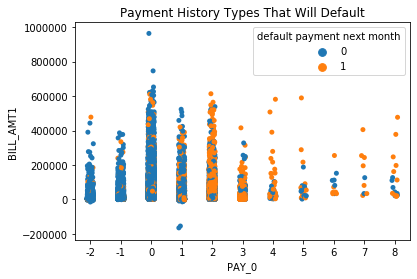

In [147]:
ax = sns.stripplot(x="PAY_0", y="BILL_AMT1", data=raw_data, hue="default payment next month").set_title("Payment History Types That Will Default")

Looking at the categories of payment history, it is clear that a history of deferred payments increases the likelihood of default payment the next month. This can be seen by observing the orange tones dominating the categories starting at 2.

This shows that both the bill amount and payment history will correlate with default the next month.

### Algorithms and Techniques

I'll use the following algorithms:
* Logistic regression
* Ensemble Decisions Trees (ADAboot, etc)
* Neural networks

Since some of them are sensitive to difference in scale between features and since some of them converge better with normally distributed data, I will transform the data.

### Preprocessing

In [148]:
#counting the total number of negative bill statements
neg = raw_data[raw_data["BILL_AMT1"]<0].BILL_AMT1.count()
neg += raw_data[raw_data["BILL_AMT2"]<0].BILL_AMT2.count()
neg += raw_data[raw_data["BILL_AMT3"]<0].BILL_AMT3.count()
neg += raw_data[raw_data["BILL_AMT4"]<0].BILL_AMT4.count()
neg += raw_data[raw_data["BILL_AMT5"]<0].BILL_AMT5.count()
neg += raw_data[raw_data["BILL_AMT6"]<0].BILL_AMT6.count()

print(neg)

3932


#### Numerical Data Preprocessing

The following variables are numerical and all skewed:
* `LIMIT_BAL`
* `AGE`
* `BILL_AMT1-6`
* `PAY_AMT1-6`

These are transformed below using the Yeo-Johnson since they contain non-positive numbers (0). As observed earlier, there are negative numbers in `BILL_AMT` and `PAY_AMT` variables. Since the goal is to learn to predict default I am making an assumption that it is unlikely when credit is given to the the account.


/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


          BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      36.620559     35.121249     33.880261     32.299684     29.942681   
std       18.826170     18.769532     18.466437     17.913952     16.941836   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       23.662723     22.261255     21.334803     20.282972     18.237360   
50%       38.132311     36.947894     35.873044     34.748056     32.841596   
75%       50.115874     48.542387     46.951114     44.881430     41.877033   
max       95.195256     93.128760    102.661695     86.406453     81.594610   

          BILL_AMT6  
count  30000.000000  
mean      27.103433  
std       15.853185  
min        0.000000  
25%       15.894288  
50%       30.267468  
75%       38.615243  
max       74.217263  


Text(0.5, 1.0, 'Bill Amount Transformed')

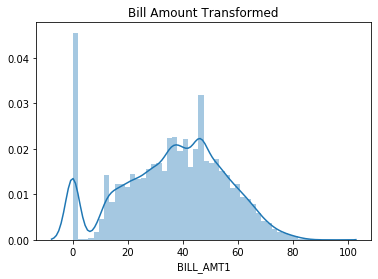

In [188]:
from sklearn import preprocessing

#Starting with bill amounts pre-processing
bill_labels = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
bill_amounts = raw_data[bill_labels]

#updating the data to be non-negative for the bill amounts
bill_amounts[bill_amounts < 0] = 0
        
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
bill_amt_normal = pd.DataFrame(pt.fit_transform(bill_amounts), columns=bill_labels)

#adjusting the default 0 index to match the index starting at 1 from the data
bill_amt_normal.index += 1

#checking the summary statistics
print(bill_amt_normal.describe())

#plotting a bill amount period to visually inspect for normality
sns.distplot(bill_amt_normal["BILL_AMT1"]).set_title("Bill Amount Transformed")

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


Text(0.5, 1.0, 'Age normal distribution')

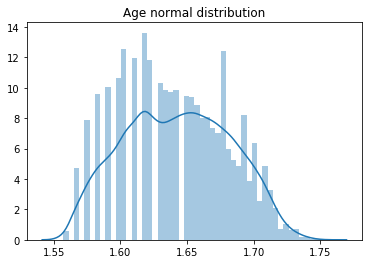

In [150]:
###Payment amounts pre-processing
pay_labels = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
pay_amounts = raw_data[pay_labels]

#updating the data to be non-negative for the bill amounts
pay_amounts[pay_amounts < 0] = 0

#using a power transformation
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
pay_normal_labels = ["PAY_AMT1_norm","PAY_AMT2_norm","PAY_AMT3_norm","PAY_AMT4_norm","PAY_AMT5_norm","PAY_AMT6_norm"]
pay_amt_normal = pd.DataFrame(pt.fit_transform(pay_amounts), columns=pay_labels)
pay_amt_normal.index += 1

###LIMIT_BAL pre-processing

#Column form required for the transformation
limit_2d = np.array(raw_data["LIMIT_BAL"]).reshape(-1, 1)

#running the transform and reshaping to make age ready to be a pandas series
limit_2d_normal = pt.fit_transform(limit_2d).reshape(1,-1)

#converting the numpy array into a series to be joined with the the other features
#hstack was needed to make the data one-dimensional
limit_normal = pd.DataFrame(np.hstack(limit_2d_normal), columns=["Limit_norm"])
limit_normal.index += 1

###Age pre-processing

#Column form required for the transformation
age_2d = np.array(raw_data["AGE"]).reshape(-1, 1)

#running the transform and reshaping to make age ready to be a pandas series
age_2d_normal = pt.fit_transform(age_2d).reshape(1,-1)

#converting the numpy array into a series to be joined with the the other features
#hstack was needed to make the data one-dimensional
age_normal = pd.DataFrame(np.hstack(age_2d_normal), columns=["Age_norm"])
age_normal.index += 1

#plotting to check work
sns.distplot(age_normal).set_title("Age normal distribution")


#### Categorical Variable Preprocessing

The following variables are categorical and need to be encoded:
* `SEX`
* `EDUCATION` 
* `MARRIAGE` 
* `PAY_0-6`

While the values in these variable are numerical, they do not have implied numerical relationships. For example, `SEX=1=Male` and `SEX=2=Female` but that does not mean that Female is greater than Male. Encoding provides the method to break apart these correlations. 

In [151]:
#Payment history uses numerical categories
#Converting this categorical information into seperate binary variables

pay_hist_category_names = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
pay_history = raw_data[pay_hist_category_names]
pay_hist_cat = pay_history.astype('category')

#converting the categorical values and changing back the type to float
pay_history_encoded = pd.get_dummies(pay_hist_cat).astype('float')

#checking the encoding
print(pay_history_encoded.head())
print(pay_history_encoded.shape)

#need to join into final dataframe

    PAY_0_-2  PAY_0_-1  PAY_0_0  PAY_0_1  PAY_0_2  PAY_0_3  PAY_0_4  PAY_0_5  \
ID                                                                             
1        0.0       0.0      0.0      0.0      1.0      0.0      0.0      0.0   
2        0.0       1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3        0.0       0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4        0.0       0.0      1.0      0.0      0.0      0.0      0.0      0.0   
5        0.0       1.0      0.0      0.0      0.0      0.0      0.0      0.0   

    PAY_0_6  PAY_0_7  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  \
ID                    ...                                                  
1       0.0      0.0  ...       1.0       0.0      0.0      0.0      0.0   
2       0.0      0.0  ...       0.0       0.0      0.0      1.0      0.0   
3       0.0      0.0  ...       0.0       0.0      1.0      0.0      0.0   
4       0.0      0.0  ...       0.0       0.0      1.0     

In [152]:
###Encoding the Sex variable
sex = raw_data["SEX"]
sex_cat = sex.astype('category')

#converting the categorical values and changing back the type to float
sex_encoded = pd.get_dummies(sex_cat, prefix="sex").astype('float')

###Encoding the Education variable
education = raw_data["EDUCATION"]
education_cat = education.astype('category')

#converting the categorical values and changing back the type to float
education_encoded = pd.get_dummies(education_cat, prefix='education').astype('float')

###Encoding the Marriage variable
marriage = raw_data["MARRIAGE"]
marriage_cat = education.astype('category')

#converting the categorical values and changing back the type to float
marriage_encoded = pd.get_dummies(marriage_cat, prefix="marriage").astype('float')

#### Building the Final Dataframe

Now that preprocessing all the variable is complete, I join them all together for the final dataframe. 

In [153]:
#Admittedly a hacky way to construct the final dataframe
final_dataframe1 = bill_amt_normal.join(pay_amt_normal)
final_dataframe2 = final_dataframe1.join(limit_normal)
final_dataframe3 = final_dataframe2.join(age_normal)
final_dataframe4 = final_dataframe3.join(pay_history_encoded)
final_dataframe5 = final_dataframe4.join(sex_encoded)
final_dataframe6 = final_dataframe5.join(education_encoded)
final_dataframe7 = final_dataframe6.join(marriage_encoded)
final_dataframe = final_dataframe7.dropna()
print(final_dataframe.shape)

(30000, 94)


In [154]:
final_dataframe.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,education_4,education_5,education_6,marriage_0,marriage_1,marriage_2,marriage_3,marriage_4,marriage_5,marriage_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,36.620559,35.121249,33.880261,32.299684,29.942681,27.103433,18.570387,17.169297,14.810331,13.194731,...,0.004100,0.009333,0.001700,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700
std,18.826170,18.769532,18.466437,17.913952,16.941836,15.853185,10.768919,10.067875,9.086266,8.361448,...,0.063901,0.096159,0.041197,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.662723,22.261255,21.334803,20.282972,18.237360,15.894288,15.939223,14.397391,10.956261,9.670086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.132311,36.947894,35.873044,34.748056,32.841596,30.267468,19.507425,18.182131,16.332231,14.648593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.115874,48.542387,46.951114,44.881430,41.877033,38.615243,24.481308,22.888121,20.377246,18.422936,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,95.195256,93.128760,102.661695,86.406453,81.594610,74.217263,84.016840,85.922262,63.677469,51.898703,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


With the encoding of the categorical variables, there are now 94 variables.

In [155]:
#checking the column names
final_dataframe.columns

Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Limit_norm', 'Age_norm', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'sex_1', '

## Implementation

In [156]:
from sklearn.model_selection import train_test_split

#split data into training-test-validation
X_train, X_test, y_train, y_test = train_test_split(final_dataframe, target, test_size=0.20, random_state=42)


#### Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV

#initializing the classifier
clf = LogisticRegression(random_state=42, solver='liblinear', max_iter=10000)

#creating a dictionary of parameters for grid search
parameters = {'C':[.5, 1, 2, 4], 'penalty':['l1','l2']}
scorer = make_scorer(accuracy_score)

#running grid search to find best hyperparameters
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

#identifying best model
best_clf = grid_fit.best_estimator_
print(best_clf)

#Calculating binary predictions
predictions_train_data = best_clf.predict(X_train)
predictions_test_data = best_clf.predict(X_test)

#Using the predict_proba method to get probabilities instead of binary classifications
probabilities_train_data = best_clf.predict_proba(X_train)
probabilities_test_data = best_clf.predict_proba(X_test)

#Calculating the ROC-AUC metrics
roc_train_score = roc_auc_score(y_train, probabilities_train_data[:,1])
roc_test_score = roc_auc_score(y_test, probabilities_test_data[:,1])
print('ROC AUC train score: %.2f%%' %  (roc_train_score*100))
print('ROC AUC test score: %.2f%%' %  (roc_test_score*100))

#Calculating the accuracy
accuracy_train_score = accuracy_score(y_train, predictions_train_data)
accuracy_test_score = accuracy_score(y_test, predictions_test_data)
print('Accuracy train score: %.2f%%' %  (accuracy_train_score*100))
print('Accuracy test score: %.2f%%' %  (accuracy_test_score*100))


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
ROC AUC train score: 78.12%
ROC AUC test score: 77.33%
Accuracy train score: 82.18%
Accuracy test score: 81.95%


Confusion matrix, without normalization
[[4468  219]
 [ 864  449]]
Normalized confusion matrix
[[0.95 0.05]
 [0.66 0.34]]


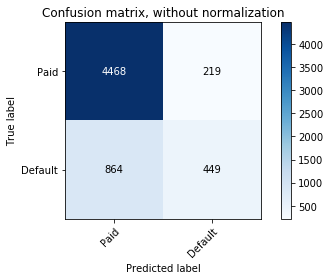

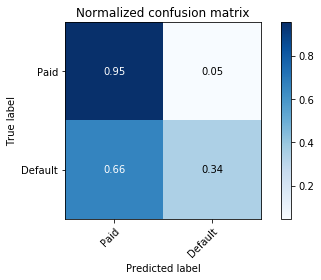

In [158]:
#modified from scikit learn example
from sklearn.utils.multiclass import unique_labels

class_names = ['Paid','Default']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_data , classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_data , classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

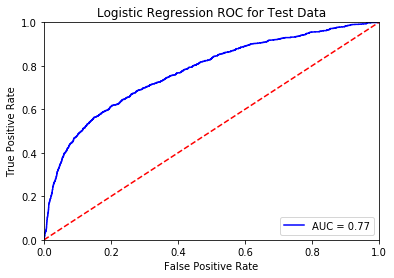

In [159]:
#Plotting the ROC curve for visualization for Test Data
lr_fpr, lr_tpr, threshold = roc_curve(y_test, probabilities_test_data[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)
plt.title('Logistic Regression ROC for Test Data')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### ADABoost

In [160]:
from sklearn.ensemble import AdaBoostClassifier

#initializing the classifier
clf_ADA = AdaBoostClassifier(random_state=42)

#creating a dictionary of parameters for grid search
parameters = {'learning_rate':[.5, 1, 2], 'n_estimators':[25,50,100]}
scorer = make_scorer(accuracy_score)

#running grid search to find best hyperparameters
grid_obj = GridSearchCV(clf_ADA, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

#identifying best model
best_clf_ADA = grid_fit.best_estimator_
print(best_clf_ADA)

#Calculating binary predictions
ADA_predictions_train = best_clf_ADA.predict(X_train)
ADA_predictions_test = best_clf_ADA.predict(X_test)

#Using the predict_proba method to get probabilities instead of binary classifications
ADA_probabilities_train_data = best_clf_ADA.predict_proba(X_train)
ADA_probabilities_test_data = best_clf_ADA.predict_proba(X_test)

#Calculating the ROC-AUC metrics
ADA_roc_train_score = roc_auc_score(y_train, ADA_probabilities_train_data[:,1])
ADA_roc_test_score = roc_auc_score(y_test, ADA_probabilities_test_data[:,1])
print('ROC AUC train score: %.2f%%' % (roc_train_score * 100))
print('ROC AUC test score: %.2f%%' %  (roc_test_score * 100))

#Calculating the accuracy
ADA_accuracy_train_score = accuracy_score(y_train, ADA_predictions_train)
ADA_accuracy_test_score = accuracy_score(y_test, ADA_predictions_test)
print('Accuracy train score: %.2f%%' %  (ADA_accuracy_train_score * 100))
print('Accuracy test score: %.2f%%' %  (ADA_accuracy_test_score*100))

  

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=42)
ROC AUC train score: 78.12%
ROC AUC test score: 77.33%
Accuracy train score: 81.95%
Accuracy test score: 81.65%


Text(0.5, 1.0, 'ADA Boost Feature Importance')

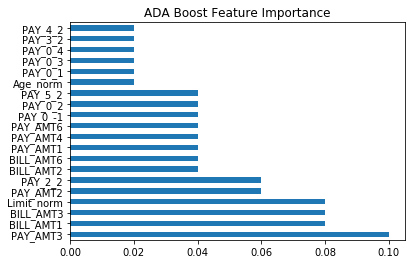

In [161]:
feat_importances = pd.Series(best_clf_ADA.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh').set_title("ADA Boost Feature Importance")

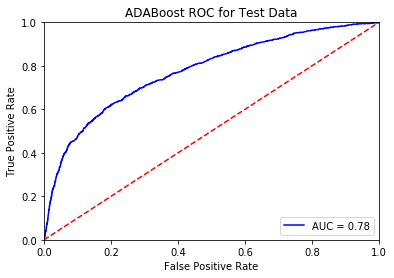

In [162]:
#Plotting the ROC curve for visualization for Test Data
ada_fpr, ada_tpr, threshold = roc_curve(y_test, ADA_probabilities_test_data[:,1])
ada_roc_auc = auc(ada_fpr, ada_tpr)
plt.title('ADABoost ROC for Test Data')
plt.plot(ada_fpr, ada_tpr, 'b', label = 'AUC = %0.2f' % ada_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### XGBoost

In [163]:
from xgboost import XGBClassifier

#Instantiating the classifier
clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)

#creating a dictionary of parameters for grid search
params = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]}
scorer = make_scorer(accuracy_score)

#running grid search to find best hyperparameters
grid_obj = GridSearchCV(clf_XGB, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

#identifying best model
best_clf_XGB = grid_fit.best_estimator_
print(best_clf_XGB)

#Calculating binary predictions
XGB_train_predictions = best_clf_XGB.predict(X_train)
XGB_test_predictions = best_clf_XGB.predict(X_test)

#Using the predict_proba method to get probabilities instead of binary classifications
XGB_probabilities_train_data = best_clf_XGB.predict_proba(X_train)
XGB_probabilities_test_data = best_clf_XGB.predict_proba(X_test)

#Calculating the ROC-AUC metrics
XGB_roc_train_score = roc_auc_score(y_train, XGB_probabilities_train_data[:,1])
XGB_roc_test_score = roc_auc_score(y_test, XGB_probabilities_test_data[:,1])
print('XGBoost ROC AUC train score: %.2f%%' % (XGB_roc_train_score * 100.0))
print('XGBoost ROC AUC test score: %.2f%%' % (XGB_roc_test_score * 100.0))

#Calculating the accuracy
XGB_train_accuracy = accuracy_score(y_train, XGB_train_predictions)
XGB_test_accuracy = accuracy_score(y_test, XGB_test_predictions)
print("XGBoost Training Accuracy: %.2f%%" % (XGB_train_accuracy * 100.0))
print("XGBoost Test Accuracy: %.2f%%" % (XGB_test_accuracy * 100.0))

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBoost ROC AUC train score: 80.62%
XGBoost ROC AUC test score: 77.98%
XGBoost Training Accuracy: 82.51%
XGBoost Test Accuracy: 82.08%


Text(0.5, 1.0, 'XGBoost Feature Importance')

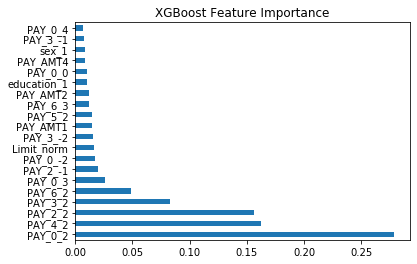

In [164]:
feat_importances = pd.Series(best_clf_XGB.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh').set_title("XGBoost Feature Importance")

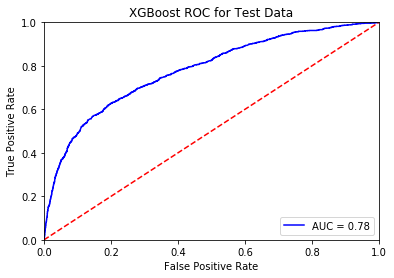

In [165]:
xg_fpr, xg_tpr, threshold = roc_curve(y_test, XGB_probabilities_test_data[:,1])
xg_roc_auc = auc(xg_fpr, xg_tpr)
plt.title('XGBoost ROC for Test Data')
plt.plot(xg_fpr, xg_tpr, 'b', label = 'AUC = %0.2f' % xg_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[4460  227]
 [ 848  465]]
Normalized confusion matrix
[[0.95 0.05]
 [0.65 0.35]]


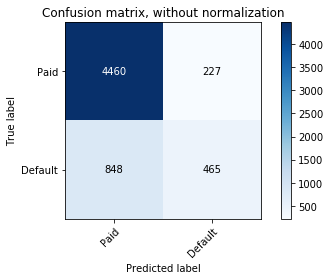

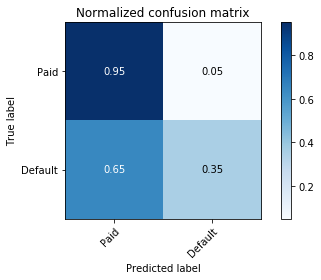

In [169]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, XGB_test_predictions , classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, XGB_test_predictions , classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Neural Network

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

#Encoding the target variable into dummy categorical variables. Needed for crossentropy.
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

#building the model
clf_NN = Sequential()
clf_NN.add(Dense(64, activation='relu', input_shape=(94,)))
clf_NN.add(Dropout(.3))
clf_NN.add(Dense(32, activation='relu'))
clf_NN.add(Dropout(.3))
clf_NN.add(Dense(2, activation='softmax'))

#compling the model
clf_NN.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
clf_NN.summary()

#training the model
clf_NN.fit(X_train, y_binary_train, epochs=50, batch_size=32, verbose=2)

#calculating predictions
NN_probabilities_train_data = clf_NN.predict_proba(X_train)
NN_probabilities_test_data = clf_NN.predict_proba(X_test)

#Calculating the ROC-AUC metrics
NN_roc_train_score = roc_auc_score(y_train, NN_probabilities_train_data[:,1])
NN_roc_test_score = roc_auc_score(y_test, NN_probabilities_test_data[:,1])
print('Neural Network ROC AUC train score: %.2f%%' % (NN_roc_train_score * 100.0))
print('Neural Network ROC AUC test score: %.2f%%' % (NN_roc_test_score * 100.0))

#Calculating the accuracy
NN_train_accuracy = clf_NN.evaluate(X_train, y_binary_train, verbose=0)
NN_test_accuracy = clf_NN.evaluate(X_test, y_binary_test, verbose=0)
print("Neural Network Train Accuracy: %.2f%%" % (NN_train_accuracy[1] * 100.0))
print("Neural Network Test Accuracy: %.2f%%" % (NN_test_accuracy[1] * 100.0))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                6080      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 66        
Total params: 8,226
Trainable params: 8,226
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 - 1s - loss: 0.6125 - acc: 0.7589
Epoch 2/50
 - 1s - loss: 0.4951 - acc: 0.7797
Epoch 3/50
 - 1s - loss: 0.4763 - acc: 0.7908
Ep

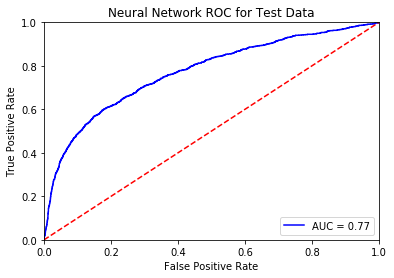

In [167]:
NN_test_predictions = clf_NN.predict(X_test)[:,1]
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test.ravel(), NN_test_predictions)

NN_roc_auc = auc(fpr_NN, tpr_NN)
plt.title('Neural Network ROC for Test Data')
plt.plot(fpr_NN, tpr_NN, 'b', label = 'AUC = %0.2f' % NN_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Evaluation

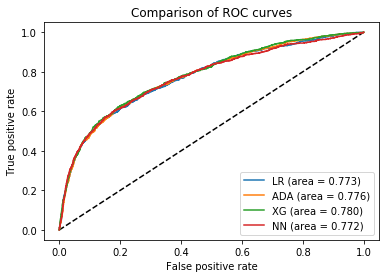

In [168]:
#overlaying the plots for comparison of the curves
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_fpr, lr_tpr, label='LR (area = {:.3f})'.format(lr_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ADA (area = {:.3f})'.format(ada_roc_auc))
plt.plot(xg_fpr, xg_tpr, label='XG (area = {:.3f})'.format(xg_roc_auc))
plt.plot(fpr_NN, tpr_NN, label='NN (area = {:.3f})'.format(NN_roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Comparison of ROC curves')
plt.legend(loc='best')
plt.show()

## Free Form Visualization

In [187]:
#Selecting the observations with only paid histories
perfect_records = raw_data[(raw_data.PAY_0 < 1) & (raw_data.PAY_2 < 1)&(raw_data.PAY_3 < 1) & (raw_data.PAY_4 < 1)&(raw_data.PAY_5 < 1) & (raw_data.PAY_6 < 1)]

Text(0.5, 0.98, 'Good Gone Bad')

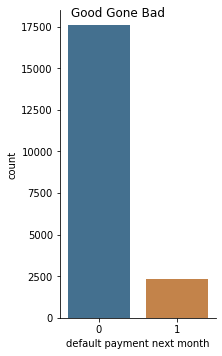

In [186]:
g = sns.catplot(x="default payment next month",
                 data=perfect_records, saturation=.5,
                 kind="count", ci=None, aspect=.6)
g.fig.suptitle('Good Gone Bad')